In [1]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import callbacks

/home/amit/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
train_data_dir = './data/train'
validation_data_dir = './data/test'

img_width, img_height = 90, 90
batch_size = 32

train_datagen = ImageDataGenerator(rescale= 1. / 255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = False)

test_datagen = ImageDataGenerator(
    rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 459 images belonging to 2 classes.
Found 76 images belonging to 2 classes.


In [17]:
nb_filters1 = 32
conv1_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), padding="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

In [18]:
nb_filters2 = 64
conv2_size = 2

model.add(Conv2D(nb_filters2, (conv2_size, conv2_size), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size))) # , data_format='channels_first'))

In [19]:
classes_num = 2

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

In [20]:
lr = 0.0004

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 90, 90, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 90, 90, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        8256      
_________________________________________________________________
activation_5 (Activation)    (None, 45, 45, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
__________

In [22]:
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

In [23]:
nb_train_samples = 400
nb_validation_samples = 50

epochs = 10

model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=nb_validation_samples)

/home/amit/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=10, validation_data=<keras.pre..., callbacks=[<keras.ca..., validation_steps=50, steps_per_epoch=12)`
  if sys.path[0] == '':


Epoch 1/10
12/12 [==============================] - 19s 2s/step - loss: 1.3281 - acc: 0.6351 - val_loss: 0.4778 - val_acc: 0.7758
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 0.3155 - acc: 0.8489 - val_loss: 0.4007 - val_acc: 0.8422
Epoch 3/10
12/12 [==============================] - 24s 2s/step - loss: 0.2296 - acc: 0.8934 - val_loss: 0.3785 - val_acc: 0.8305
Epoch 4/10
12/12 [==============================] - 21s 2s/step - loss: 0.1773 - acc: 0.9115 - val_loss: 0.3774 - val_acc: 0.8422
Epoch 5/10
12/12 [==============================] - 18s 2s/step - loss: 0.1916 - acc: 0.9058 - val_loss: 0.3377 - val_acc: 0.8820
Epoch 6/10
12/12 [==============================] - 23s 2s/step - loss: 0.1393 - acc: 0.9352 - val_loss: 0.5579 - val_acc: 0.8156
Epoch 7/10
12/12 [==============================] - 24s 2s/step - loss: 0.1276 - acc: 0.9346 - val_loss: 0.3527 - val_acc: 0.9070
Epoch 8/10
12/12 [==============================] - 23s 2s/step - loss: 0.1312 - acc: 0.94

In [10]:
target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

In [11]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

In [12]:
img_width, img_height = 90, 90
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

In [13]:
def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  print(x[0][10][10])
  array = model.predict(x)
  result = array[0]
  if result[0] > result[1]:
    print("Predicted answer: France")
    answer = 'france'
  else:
    print("Predicted answer: India")
    answer = 'india'

  return answer

In [14]:
testdata_dir = './test-data'
result = predict(testdata_dir + '/' + 'france1.jpg')
result = predict(testdata_dir + '/' + 'france2.jpg')

[237. 237. 239.]
Predicted answer: India
[255. 255. 255.]
Predicted answer: India


In [15]:
result = predict(testdata_dir + '/' + 'india1.jpg')

[241. 241. 241.]
Predicted answer: India


In [76]:
file = testdata_dir + '/' + 'india1.jpg'
x = load_img(file, target_size=(img_width,img_height))
x = img_to_array(x)

In [85]:
x[45][45]

array([101., 115., 162.], dtype=float32)

[0.9450981 0.9450981 0.9450981]


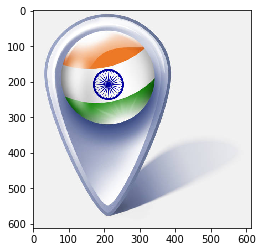

In [94]:
import numpy as np
from matplotlib import pyplot

file = testdata_dir + '/' + 'india1.jpg'

img = load_img(file)
img_arr = np.expand_dims(img_to_array(img), axis=0)
datagen = ImageDataGenerator(rescale=1./255)

for batch in datagen.flow(img_arr, batch_size=1):
    print(batch[0][0][0])
    pyplot.imshow(batch[0])
    pyplot.show()
    break